In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
data = pd.read_csv("../data/data.csv" , nrows=1000 , dtype={
    'TransactionId': str,
    'BatchId': str,
    'AccountId': str,
    'SubscriptionId': str,
    'CustomerId': str,
    'CurrencyCode': str,
    'CountryCode': int,
    'ProviderId': str,
    'ProductId': str,
    'ProductCategory': str,
    'ChannelId': str,
    'Amount': float,
    'Value': int,
    'TransactionStartTime': str,
    'PricingStrategy': int,
    'FraudResult': int
})

In [3]:
data['TransactionId'] = data['TransactionId'].str.extract('(\d+)') # Extract only numeric part
data['BatchId'] = data['BatchId'].str.extract('(\d+)') # Extract only numeric part
data['AccountId'] = data['AccountId'].str.extract('(\d+)') # Extract only numeric part
data['SubscriptionId'] = data['SubscriptionId'].str.extract('(\d+)') # Extract only numeric part
data['CustomerId'] = data['CustomerId'].str.extract('(\d+)') # Extract only numeric part
data['ProviderId'] = data['ProviderId'].str.extract('(\d+)') # Extract only numeric part
data['ProductId'] = data['ProductId'].str.extract('(\d+)') # Extract only numeric part
data['ChannelId'] = data['ChannelId'].str.extract('(\d+)') # Extract only numeric part


In [4]:
# Split the data into features (X) and target variable (y)
X = data.drop('FraudResult', axis=1)
y = data['FraudResult']

In [5]:
# Convert TransactionStartTime column to datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Extract useful information from the datetime column
data['Year'] = data['TransactionStartTime'].dt.year
data['Month'] = data['TransactionStartTime'].dt.month
data['Day'] = data['TransactionStartTime'].dt.day
data['Hour'] = data['TransactionStartTime'].dt.hour
data['Minute'] = data['TransactionStartTime'].dt.minute

In [9]:
# Split the data into features (X) and target variable (y)
X = data.drop(['FraudResult', 'TransactionStartTime'], axis=1)
y = data['FraudResult']



In [10]:
# Perform one-hot encoding on categorical columns
categorical_cols = ['CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = preprocessor.fit_transform(X)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Choose the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [13]:
# Train the models
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model

In [14]:
# Hyperparameter Tuning
parameters = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300]}
}

In [15]:
# Grid Search
grid_search_models = {}
for model_name, model in trained_models.items():
    if model_name in parameters:
        param_grid = parameters[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        grid_search_models[model_name] = grid_search.best_estimator_


c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [16]:
# Random Search
random_search_models = {}
for model_name, model in trained_models.items():
    if model_name in parameters:
        param_dist = parameters[model_name]
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5)
        random_search.fit(X_train, y_train)
        random_search_models[model_name] = random_search.best_estimator_

c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\huawe

In [17]:
# Print the best parameters for each model
for model_name, model in grid_search_models.items():
    print(f"Best parameters for {model_name}: {model.get_params()} (Grid Search)")

for model_name, model in random_search_models.items():
    print(f"Best parameters for {model_name}: {model.get_params()} (Random Search)")

Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} (Grid Search)
Best parameters for Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'} (Grid Search)
Best parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'mo

In [23]:
import matplotlib.pyplot as plt

# Print the best parameters for each model
grid_search_results = []
random_search_results = []

for model_name, model in grid_search_models.items():
    grid_search_results.append((model_name, model.get_params()))

for model_name, model in random_search_models.items():
    random_search_results.append((model_name, model.get_params()))


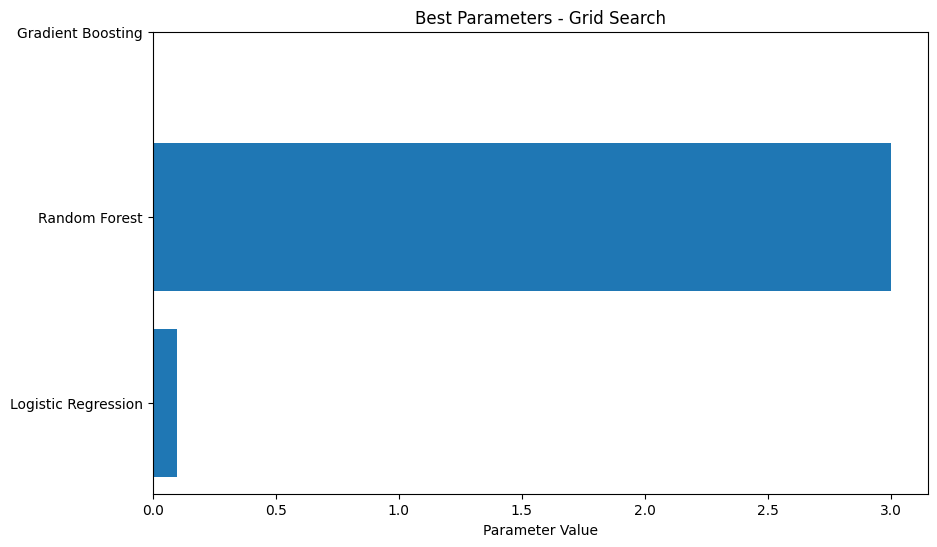

In [24]:
# Create a bar plot for Grid Search results
grid_search_values = [result[1].get('C', result[1].get('max_depth', result[1].get('n_estimators'))) for result in grid_search_results]
grid_search_values = [value for value in grid_search_values if value is not None]
grid_search_labels = [result[0] for result in grid_search_results if result[1].get('C') or result[1].get('max_depth') or result[1].get('n_estimators')]
plt.figure(figsize=(10, 6))
plt.barh(range(len(grid_search_values)), grid_search_values, align='center')
plt.yticks(range(len(grid_search_labels)), grid_search_labels)
plt.xlabel('Parameter Value')
plt.title('Best Parameters - Grid Search')
plt.show()

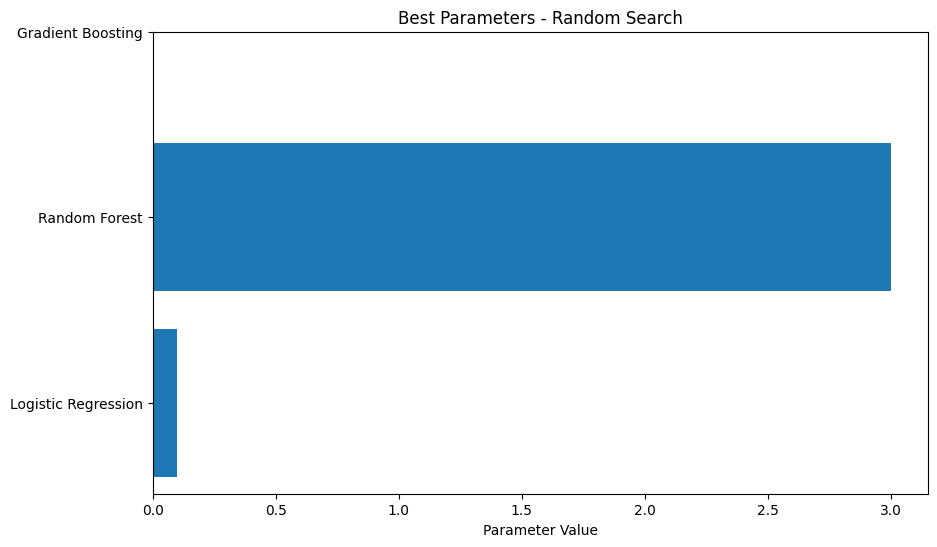

In [25]:
# Create a bar plot for Random Search results
random_search_values = [result[1].get('C', result[1].get('max_depth', result[1].get('n_estimators'))) for result in random_search_results]
random_search_values = [value for value in random_search_values if value is not None]
random_search_labels = [result[0] for result in random_search_results if result[1].get('C') or result[1].get('max_depth') or result[1].get('n_estimators')]
plt.figure(figsize=(10, 6))
plt.barh(range(len(random_search_values)), random_search_values, align='center')
plt.yticks(range(len(random_search_labels)), random_search_labels)
plt.xlabel('Parameter Value')
plt.title('Best Parameters - Random Search')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    roc_auc = None
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
    except ValueError:
        pass
    
    return accuracy, precision, recall, f1, roc_auc

In [38]:
# Evaluate performance for each model using the best parameters
print("Model Performance Evaluation:")
for model_name, model in grid_search_models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("")

Model Performance Evaluation:
Logistic Regression:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: None

Decision Tree:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: None

Random Forest:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: None

Gradient Boosting:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: None



c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi